### ARIMA

> how the present depends on the past after removing non-stationary

`ARIMA(p,d,q)`

- AR (AutoRegressive): Use Past values to predict future
- I (Integrated): &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Make the data stationary by differencing
- MA (Moving Average): Use past ERRORs to predict future

p = number of autoregressive terms (how many past values)\
d = degree of differencing (how many times to difference)\
q = number of moving average terms (how many past errors)

AR(1):\
`Y(t) = c + φ₁ * Y(t-1) + ε(t)`

Where
 - Y(t) = value at time t
 - c = constant (intercept)
 - φ₁ = coefficient (how much weight we give to past value)
 - Y(t-1) = value at time T-1 (yesterday)
 - ε(t) = random error (white noise)

`AR(p) = c + φ₁Y(t-1) + φ₂Y(t-2) + ... + φₚY(t-p) + ε(t)`

#Important Property: Stationary Condition
 - AR(1): |φ₁| < 1 

<br>

Most real data are not Stationary and ARIMA needs Stationary data!\
Cause ARIMA statistical properties assume (mean, variance, autocorrelation) are constant overtime.

Solution: Differencing\
`d=1`\
∇Y(t) = Y(t) - Y(t-1)

`d=2 (second differencing)`\
∇²Y(t) = ∇Y(t) - ∇Y(t-1)\
    = [Y(t) - Y(t-1)] - [Y(t-1) - Y(t-2)]\
    = Y(t) - 2Y(t-1) + Y(t-2)

<br>

Error Correction Part

Today's value depends on the past FORECAST Errors\
Learned from past mistakes and make short-term corrections

MA(1):\
`Y(t) = μ + ε(t) + θ₁ × ε(t-1)`

Where:
- `μ` = mean
- `ε(t)` = current error (random shock)
- `θ₁` = coefficient
- `ε(t-1)` = previous error


`MA(q) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θ_qε(t-q)`

##Important Properties
 - MA(1): |θ₁| < 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from statsforecast.utils import AirPassengersDF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['axes.grid'] = True

/Users/nyeinchan/Desktop/time-series/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = AirPassengersDF
df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


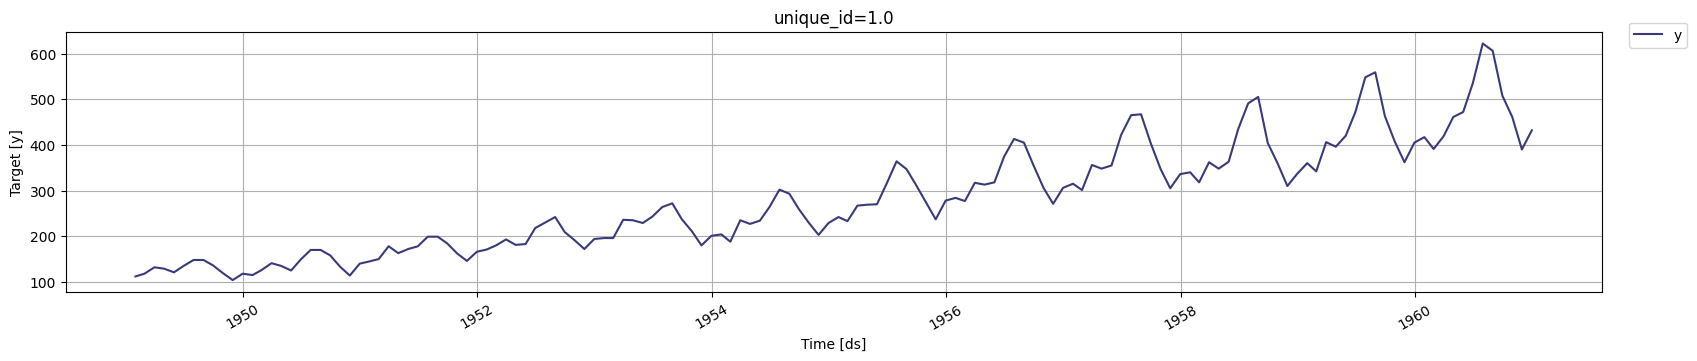

In [3]:
f = StatsForecast.plot(df)
f

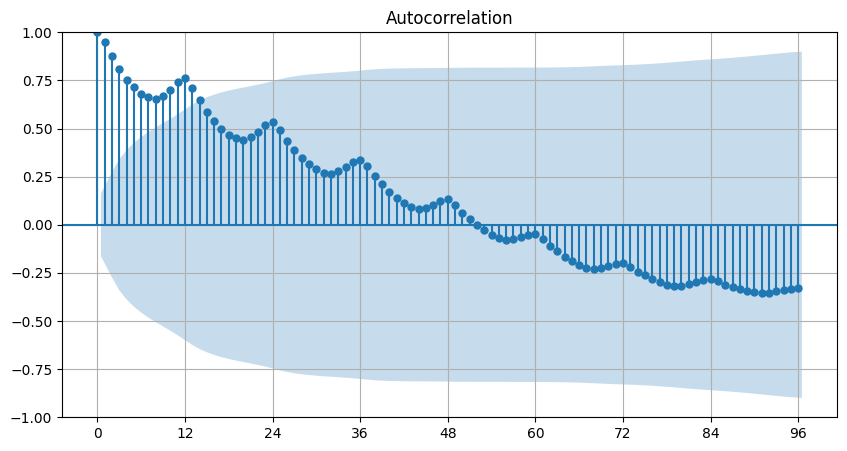

In [4]:
plt.rc("figure", figsize=(10,5))
# total correlation from lag0 upto lagk
plot_acf(df.y, lags=12*8)
plt.xticks(range(0, 97, 12))
plt.show()

slowly decay = trend is present in my series.\
high correlation at every 12th step = seasonality is present in my series\

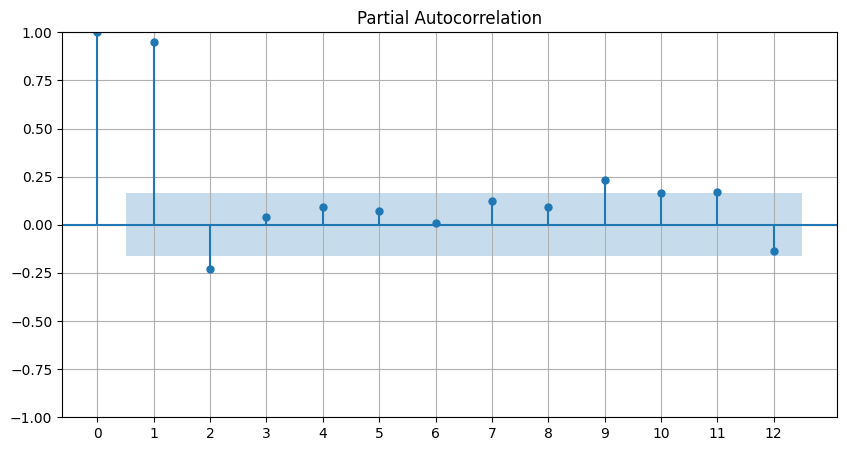

In [5]:
plt.rc("figure", figsize=(10,5))
# after removing the effects between lag1 and lagk-1
# is there still direct relation between yt and yt-k
plot_pacf(df.y, lags=12)
plt.xticks(range(0, 13, 1))
plt.show()

We saw strong trend and seasonal pattern in ACF plot\
It is better not to interpret this plot before differencing to kill the trend.

In [6]:
df_diff = df.copy(deep=True)

In [7]:
# to kill this linear trend we will difference
df_diff['y'] = df_diff['y'] - df_diff['y'].shift(1)

# since first value doesnt have past value it will be nan and we will drop it
df_diff = df_diff.dropna()

In [8]:
df_diff

,unique_id,ds,y
1,1.0,1949-02-28,6.0
2,1.0,1949-03-31,14.0
3,1.0,1949-04-30,-3.0
4,1.0,1949-05-31,-8.0
5,1.0,1949-06-30,14.0
...,...,...,...
139,1.0,1960-08-31,-16.0
140,1.0,1960-09-30,-98.0
141,1.0,1960-10-31,-47.0
142,1.0,1960-11-30,-71.0


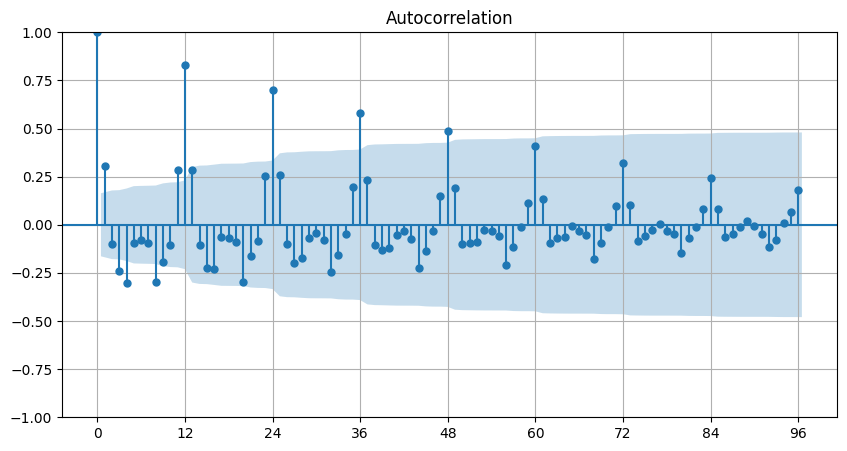

In [9]:
plt.rc("figure", figsize=(10,5))
plot_acf(df_diff.y, lags=12*8)
plt.xticks(range(0, 97, 12))
plt.show()

strong seasonal pattern can be seen here\
lag(1) is out of confidence interval and slighly correlated with lag(0) meaning it could be a candidate for MA(1)\

Meaning today depends on today's shock + yesterday's shock

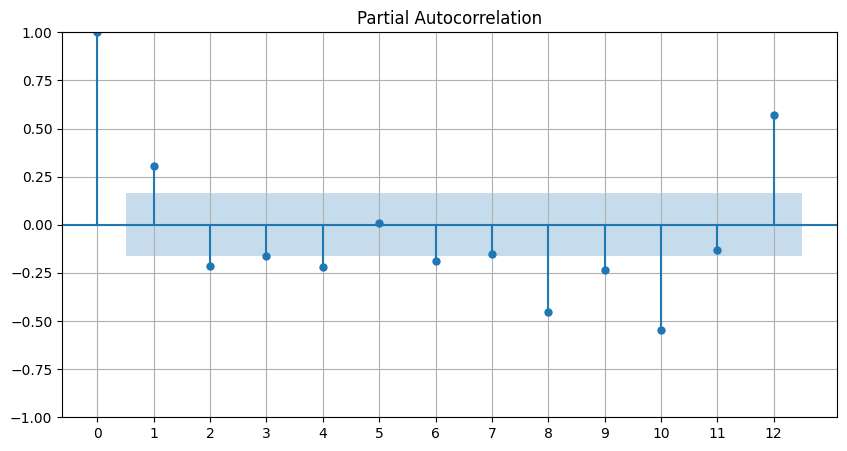

In [10]:
plt.rc("figure", figsize=(10,5))
plot_pacf(x=df_diff.y, lags=12)
plt.xticks(range(0, 13, 1))
plt.show()

After removing the trend we saw strong correlation with lag0 and lag12.\
Correlation between each year's same month are strong and candidate for Seasonal AR(1)

### SARIMA

Seasonal Arima

`SARIMA(p,d,q)(P,D,Q)m` or `ARIMA(p,d,q)x(P,D,Q)m`

Where
 - (p,d,q): non-seasonal parts
 - (P,D,Q): Seasonal parts
 - m = seasonal period (number of time steps per season)

<br>

 | Data Frequency | Seasonal Period (m) | Example Pattern |
|---------------|--------------------|-----------------|
| Hourly        | m = 24             | Daily pattern (same hour each day) |
| Daily         | m = 7              | Weekly pattern (Mondays similar) |
| Daily         | m = 365            | Yearly pattern (same day each year) |
| Weekly        | m = 52             | Yearly pattern (same week each year) |
| Monthly       | m = 12             | Yearly pattern (January similar to January) |
| Quarterly     | m = 4              | Yearly pattern (Q1 similar to Q1) |
